# Sequential Model Analysis

In [0]:
import pickle

In [0]:
with open('Waze-Data-Sequences-with-Radius.pickle', 'rb') as f:
  event_list, df = pickle.load(f)

In [0]:
event_list

{1: 'minor accident',
 2: 'other',
 3: 'road closed',
 4: 'stopped car on the shoulder',
 5: 'traffic jam',
 6: 'major event',
 7: 'pothole',
 8: 'missing sign on the shoulder',
 9: 'stopped car',
 10: 'hazard on the shoulder',
 11: 'accident',
 12: 'flooding',
 13: 'road construction',
 14: 'stopped traffic',
 15: 'object on roadway',
 16: 'animal struck',
 17: 'heavy traffic',
 18: 'small traffic jam',
 19: 'slowdown',
 20: 'animal on the shoulder',
 21: 'large traffic jam',
 22: 'traffic heavier than normal',
 23: 'malfunctioning traffic light',
 24: 'medium traffic jam',
 25: 'hazard on road',
 26: 'weather hazard',
 27: 'road closed due to construction',
 28: 'hail',
 29: 'ice on roadway',
 30: 'fog',
 31: 'huge traffic jam',
 32: 'road closed due to hazard'}

In [0]:
df.head()

,label,events
0,1,"[stopped car on the shoulder, stopped car on t..."
1,1,"[traffic jam, traffic jam, traffic jam, medium..."
2,1,[stopped car on the shoulder]
3,1,"[slowdown, stopped car on the shoulder, major ..."
4,1,"[stopped car on the shoulder, stopped car on t..."


In [0]:
df.tail()

,label,events
66681,0,"[traffic jam, traffic jam, traffic jam, traffi..."
66682,0,[traffic jam]
66683,0,[stopped car on the shoulder]
66684,0,"[road closed due to construction, traffic jam,..."
66685,0,"[traffic jam, traffic jam]"


In [0]:
len(df)

66686

In [0]:
df['label'].value_counts()

0    33758
1    32928
Name: label, dtype: int64

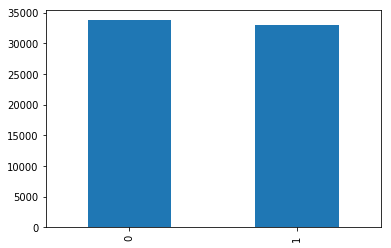

In [0]:
df['label'].value_counts().plot(kind='bar')

### We see that the records for 0 and 1 are unequal and we need to normalize the dataset to avoid a dummy model

In [0]:
df0=df[df['label'] == 0]

In [0]:
df0.reset_index(drop=True, inplace=True)

In [0]:
len(df0)

33758

In [0]:
df0.head()

,label,events
0,0,"[traffic jam, traffic jam]"
1,0,"[stopped car on the shoulder, stopped car on t..."
2,0,[heavy traffic]
3,0,[stopped car on the shoulder]
4,0,[traffic jam]


In [0]:
df1=df[df['label'] == 1]

In [0]:
df1.reset_index(drop=True, inplace=True)

In [0]:
len(df1)

32928

In [0]:
sampdf0=df0.sample(n=len(df1), random_state=12)

In [0]:
sampdf0.head()

,label,events
19926,0,"[traffic jam, traffic jam, malfunctioning traf..."
30730,0,"[stopped traffic, heavy traffic, heavy traffic..."
13265,0,"[object on roadway, traffic heavier than norma..."
20329,0,"[traffic jam, traffic jam, traffic jam, traffi..."
1228,0,"[stopped car on the shoulder, stopped traffic,..."


In [0]:
sampdf0.reset_index(inplace=True, drop=True)
sampdf0.head()

,label,events
0,0,"[traffic jam, traffic jam, malfunctioning traf..."
1,0,"[stopped traffic, heavy traffic, heavy traffic..."
2,0,"[object on roadway, traffic heavier than norma..."
3,0,"[traffic jam, traffic jam, traffic jam, traffi..."
4,0,"[stopped car on the shoulder, stopped traffic,..."


In [0]:
df=df1.append(sampdf0, ignore_index=True)

In [0]:
df.head()

,label,events
0,1,"[stopped car on the shoulder, stopped car on t..."
1,1,"[traffic jam, traffic jam, traffic jam, medium..."
2,1,[stopped car on the shoulder]
3,1,"[slowdown, stopped car on the shoulder, major ..."
4,1,"[stopped car on the shoulder, stopped car on t..."


In [0]:
df.tail()

,label,events
65851,0,"[heavy traffic, heavy traffic, heavy traffic, ..."
65852,0,[traffic jam]
65853,0,"[heavy traffic, traffic jam, traffic jam, traf..."
65854,0,[traffic jam]
65855,0,"[traffic jam, traffic jam]"


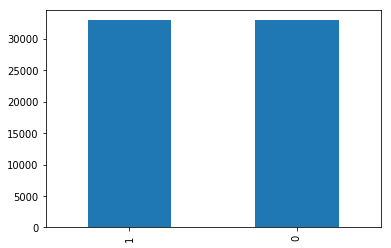

In [0]:
df['label'].value_counts().plot(kind='bar')

In [0]:
df['label'].value_counts()

1    32928
0    32928
Name: label, dtype: int64

### So after normalising the dataset, we see that we have equal records for 0 and 1

In [0]:
max_len_event_id = df.events.apply(len).idxmax()
max_len_event_id

46357

In [0]:
df.events.apply(len).idxmax()

46357

In [0]:
max_len_event = df.iloc[max_len_event_id]
max_len_event.events

['heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'stopped car on the shoulder',
 'stopped car on the shoulder',
 'heavy traffic',
 'heavy traffic',
 'traffic jam',
 'traffic jam',
 'stopped traffic',
 'stopped traffic',
 'traffic jam',
 'traffic jam',
 'traffic jam',
 'traffic jam',
 'heavy traffic',
 'heavy traffic',
 'stopped car on the shoulder',
 'stopped car on the shoulder',
 'traffic jam',
 'traffic jam',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'heavy traffic',
 'pothole',
 'pothole',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'traffic jam',
 'traffic jam',
 'heavy traffic',
 'heavy traffic',
 'traffic jam',
 'traffic jam',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'stopped car on the shoulder',
 'stopped car on the shoulde

In [0]:
maxlen = len(max_len_event.events)
maxlen

107

In [0]:
reversed_dict = {}
for k, v in event_list.items():
  reversed_dict[v] = k

In [0]:
reversed_dict

{'accident': 11,
 'animal on the shoulder': 20,
 'animal struck': 16,
 'flooding': 12,
 'fog': 30,
 'hail': 28,
 'hazard on road': 25,
 'hazard on the shoulder': 10,
 'heavy traffic': 17,
 'huge traffic jam': 31,
 'ice on roadway': 29,
 'large traffic jam': 21,
 'major event': 6,
 'malfunctioning traffic light': 23,
 'medium traffic jam': 24,
 'minor accident': 1,
 'missing sign on the shoulder': 8,
 'object on roadway': 15,
 'other': 2,
 'pothole': 7,
 'road closed': 3,
 'road closed due to construction': 27,
 'road closed due to hazard': 32,
 'road construction': 13,
 'slowdown': 19,
 'small traffic jam': 18,
 'stopped car': 9,
 'stopped car on the shoulder': 4,
 'stopped traffic': 14,
 'traffic heavier than normal': 22,
 'traffic jam': 5,
 'weather hazard': 26}

In [0]:
def event_list_to_index(event_list):
  list_idxs = []
  for event in (event_list):
    idx = reversed_dict[event]
    list_idxs.append(idx)
  return list_idxs

### So by applying the above function, we can convert the highest length sequence as below

In [0]:
event_list_to_index(max_len_event.events)

[17,
 17,
 17,
 17,
 4,
 4,
 17,
 17,
 5,
 5,
 14,
 14,
 5,
 5,
 5,
 5,
 17,
 17,
 4,
 4,
 5,
 5,
 17,
 17,
 17,
 17,
 14,
 14,
 17,
 17,
 7,
 7,
 14,
 14,
 14,
 14,
 5,
 5,
 17,
 17,
 5,
 5,
 14,
 14,
 17,
 17,
 17,
 17,
 17,
 17,
 4,
 4,
 4,
 4,
 22,
 22,
 5,
 5,
 17,
 17,
 17,
 17,
 17,
 17,
 22,
 22,
 17,
 17,
 17,
 17,
 14,
 14,
 17,
 17,
 17,
 17,
 14,
 14,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 19,
 19,
 17,
 17,
 17,
 17,
 14,
 14,
 14,
 14,
 22,
 22,
 17,
 17,
 14,
 14,
 17,
 17,
 17,
 17,
 17]

In [0]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
len(event_list)

32

### Using the same function we apply it to the events of the dataframe as follows

In [0]:
df.events.apply(event_list_to_index)

0                                                   [4, 4]
1                        [5, 5, 5, 24, 18, 14, 19, 14, 17]
2                                                      [4]
3        [19, 4, 6, 9, 17, 18, 14, 4, 14, 14, 14, 19, 1...
4                                                [4, 4, 4]
5                 [22, 19, 22, 4, 4, 5, 22, 5, 17, 17, 14]
6        [22, 19, 22, 4, 4, 5, 22, 5, 17, 17, 14, 1, 14...
7        [22, 4, 4, 5, 22, 5, 17, 17, 14, 1, 14, 4, 14,...
8                          [17, 17, 14, 14, 17, 5, 22, 17]
9        [17, 17, 14, 14, 14, 4, 17, 22, 22, 17, 17, 17...
10             [14, 4, 17, 22, 17, 5, 17, 5, 1, 5, 17, 19]
11                                          [4, 17, 4, 17]
12       [4, 4, 5, 17, 17, 17, 4, 4, 4, 22, 17, 4, 17, ...
13       [4, 22, 22, 17, 4, 5, 4, 17, 22, 17, 5, 17, 17...
14                    [17, 4, 4, 4, 4, 4, 4, 4, 4, 15, 15]
15                                                 [17, 4]
16                        [4, 4, 4, 17, 17, 4, 19, 17, 1

In [0]:
sequences = df.events.apply(event_list_to_index).tolist()
sequences[:5]

[[4, 4],
 [5, 5, 5, 24, 18, 14, 19, 14, 17],
 [4],
 [19, 4, 6, 9, 17, 18, 14, 4, 14, 14, 14, 19, 17, 9],
 [4, 4, 4]]

In [0]:
data = pad_sequences(sequences, maxlen=maxlen)
data

array([[ 0,  0,  0, ...,  0,  4,  4],
       [ 0,  0,  0, ..., 19, 14, 17],
       [ 0,  0,  0, ...,  0,  0,  4],
       ...,
       [ 0,  0,  0, ...,  5,  5,  5],
       [ 0,  0,  0, ...,  0,  0,  5],
       [ 0,  0,  0, ...,  0,  5,  5]], dtype=int32)

In [0]:
labels = np.array(df.label)

### Splitting the data into training and validation sets using the indices by shuffling using the numpy library

In [0]:
np.random.seed(12)

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [0]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [0]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [0]:
X_train

array([[ 0,  0,  0, ...,  4,  5,  5],
       [ 0,  0,  0, ...,  5,  5,  1],
       [ 0,  0,  0, ...,  0,  0,  4],
       ...,
       [ 0,  0,  0, ...,  5, 19, 17],
       [ 0,  0,  0, ...,  0,  0,  5],
       [ 0,  0,  0, ...,  5,  5,  5]], dtype=int32)

In [0]:
num_events = len(event_list) + 1

In [0]:
embedding_dim = 20

In [0]:
embedding_matrix = np.random.rand(num_events, embedding_dim)

In [0]:
embedding_matrix

array([[0.91766352, 0.57366533, 0.74021295, 0.75979354, 0.50161999,
        0.07863611, 0.44216422, 0.55708739, 0.33008473, 0.79254184,
        0.59539662, 0.9711037 , 0.75213109, 0.93612431, 0.36905699,
        0.97143277, 0.76393327, 0.42751306, 0.56878506, 0.72169639],
       [0.89993476, 0.6044866 , 0.49621787, 0.6109608 , 0.54702196,
        0.51026761, 0.37447688, 0.92942464, 0.07977561, 0.33841862,
        0.57938955, 0.87282846, 0.1644928 , 0.86531993, 0.26739778,
        0.79630282, 0.82471148, 0.29786763, 0.04377553, 0.0298776 ],
       [0.73870273, 0.85041215, 0.02007794, 0.98743531, 0.2897461 ,
        0.09616657, 0.60512622, 0.86121274, 0.29729971, 0.96288475,
        0.70424871, 0.84049482, 0.19870195, 0.49515258, 0.75568378,
        0.07387913, 0.13693151, 0.96893476, 0.75167309, 0.73344403],
       [0.03471134, 0.76042334, 0.19112812, 0.16673895, 0.44544625,
        0.6929101 , 0.22960833, 0.4487796 , 0.7036821 , 0.71606376,
        0.36728506, 0.06164051, 0.73193284, 0

# Model 1

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_valid, y_valid))
model.save("model 1.h5")

Train on 52684 samples, validate on 13172 samples
Epoch 1/50
52684/52684 [==============================] - 30s 574us/step - loss: 0.5950 - acc: 0.6747 - val_loss: 0.5933 - val_acc: 0.6842
Epoch 2/50
52684/52684 [==============================] - 29s 542us/step - loss: 0.5919 - acc: 0.6782 - val_loss: 0.5920 - val_acc: 0.6844
Epoch 3/50
52684/52684 [==============================] - 29s 543us/step - loss: 0.5901 - acc: 0.6808 - val_loss: 0.5906 - val_acc: 0.6852
Epoch 4/50
52684/52684 [==============================] - 29s 549us/step - loss: 0.5897 - acc: 0.6800 - val_loss: 0.5896 - val_acc: 0.6852
Epoch 5/50
52684/52684 [==============================] - 29s 558us/step - loss: 0.5884 - acc: 0.6793 - val_loss: 0.5893 - val_acc: 0.6874
Epoch 6/50
52684/52684 [==============================] - 29s 545us/step - loss: 0.5866 - acc: 0.6831 - val_loss: 0.5898 - val_acc: 0.6830
Epoch 7/50
52684/52684 [==============================] - 29s 545us/step - loss: 0.5861 - acc: 0.6829 - val_loss: 0.

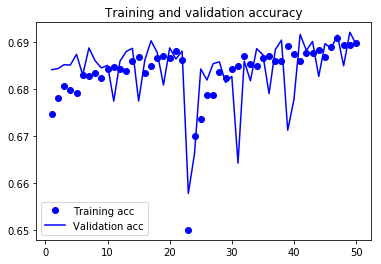

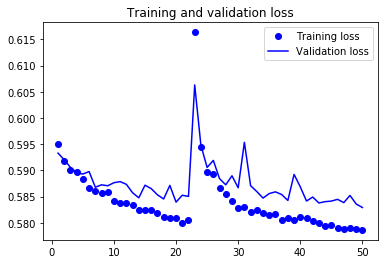

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model 2

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_valid, y_valid))
model.save("model1withtrainingembeddinglayer.h5")

Train on 52684 samples, validate on 13172 samples
Epoch 1/50
52684/52684 [==============================] - 32s 612us/step - loss: 0.6499 - acc: 0.6328 - val_loss: 0.6199 - val_acc: 0.6568
Epoch 2/50
52684/52684 [==============================] - 31s 580us/step - loss: 0.6050 - acc: 0.6665 - val_loss: 0.6049 - val_acc: 0.6606
Epoch 3/50
52684/52684 [==============================] - 31s 583us/step - loss: 0.5895 - acc: 0.6783 - val_loss: 0.5879 - val_acc: 0.6838
Epoch 4/50
52684/52684 [==============================] - 31s 580us/step - loss: 0.5852 - acc: 0.6813 - val_loss: 0.5858 - val_acc: 0.6827
Epoch 5/50
52684/52684 [==============================] - 31s 581us/step - loss: 0.5830 - acc: 0.6810 - val_loss: 0.5866 - val_acc: 0.6865
Epoch 6/50
52684/52684 [==============================] - 30s 578us/step - loss: 0.5816 - acc: 0.6841 - val_loss: 0.5847 - val_acc: 0.6795
Epoch 7/50
52684/52684 [==============================] - 33s 618us/step - loss: 0.5801 - acc: 0.6866 - val_loss: 0.

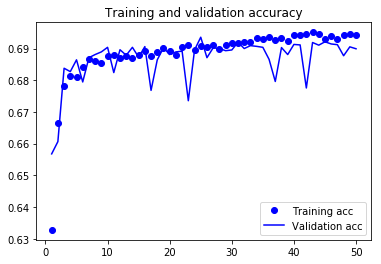

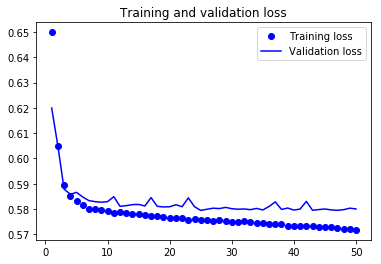

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model 3

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_valid, y_valid))
model.save("model1withdropout.h5")


Train on 52684 samples, validate on 13172 samples
Epoch 1/50
52684/52684 [==============================] - 34s 650us/step - loss: 0.6608 - acc: 0.6075 - val_loss: 0.6257 - val_acc: 0.6509
Epoch 2/50
52684/52684 [==============================] - 32s 607us/step - loss: 0.6197 - acc: 0.6537 - val_loss: 0.6084 - val_acc: 0.6554
Epoch 3/50
52684/52684 [==============================] - 32s 606us/step - loss: 0.6054 - acc: 0.6621 - val_loss: 0.5973 - val_acc: 0.6704
Epoch 4/50
52684/52684 [==============================] - 32s 615us/step - loss: 0.5974 - acc: 0.6698 - val_loss: 0.5995 - val_acc: 0.6644
Epoch 5/50
52684/52684 [==============================] - 33s 620us/step - loss: 0.5922 - acc: 0.6753 - val_loss: 0.5888 - val_acc: 0.6777
Epoch 6/50
52684/52684 [==============================] - 32s 606us/step - loss: 0.5912 - acc: 0.6741 - val_loss: 0.5858 - val_acc: 0.6829
Epoch 7/50
52684/52684 [==============================] - 32s 611us/step - loss: 0.5880 - acc: 0.6767 - val_loss: 0.

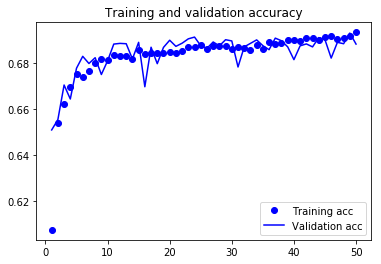

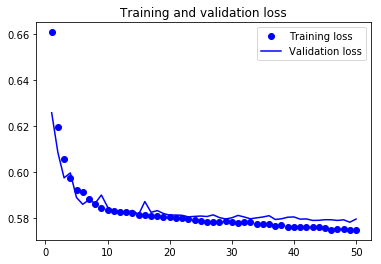

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model 4

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))


model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_valid, y_valid))
model.save("model1_with_dropoutandrecurr0.5.h5")

Train on 52684 samples, validate on 13172 samples
Epoch 1/50
52684/52684 [==============================] - 38s 724us/step - loss: 0.6751 - acc: 0.5761 - val_loss: 0.6412 - val_acc: 0.6461
Epoch 2/50
52684/52684 [==============================] - 36s 687us/step - loss: 0.6402 - acc: 0.6402 - val_loss: 0.6186 - val_acc: 0.6477
Epoch 3/50
52684/52684 [==============================] - 36s 686us/step - loss: 0.6231 - acc: 0.6502 - val_loss: 0.6076 - val_acc: 0.6535
Epoch 4/50
52684/52684 [==============================] - 36s 682us/step - loss: 0.6139 - acc: 0.6545 - val_loss: 0.6020 - val_acc: 0.6619
Epoch 5/50
52684/52684 [==============================] - 36s 683us/step - loss: 0.6093 - acc: 0.6573 - val_loss: 0.5989 - val_acc: 0.6681
Epoch 6/50
52684/52684 [==============================] - 36s 684us/step - loss: 0.6047 - acc: 0.6605 - val_loss: 0.5962 - val_acc: 0.6695
Epoch 7/50
52684/52684 [==============================] - 36s 692us/step - loss: 0.6022 - acc: 0.6643 - val_loss: 0.

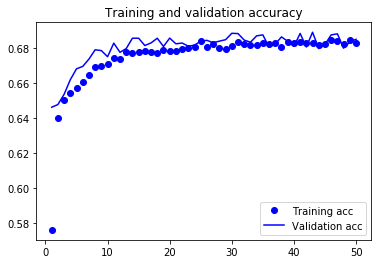

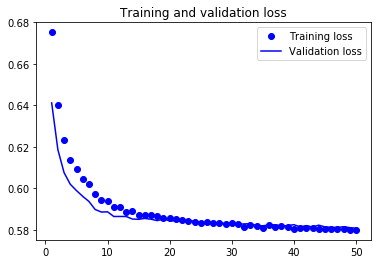

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Other Models

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(1, activation='sigmoid'))


model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_valid, y_valid))
model.save("model1withdropout0.4.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 52684 samples, validate on 13172 samples
Epoch 1/50
52684/52684 [==============================] - 38s 716us/step - loss: 0.6704 - acc: 0.5874 - val_loss: 0.6360 - val_acc: 0.6438
Epoch 2/50
52684/52684 [==============================] - 36s 687us/step - loss: 0.6362 - acc: 0.6432 - val_loss: 0.6173 - val_acc: 0.6498
Epoch 3/50
52684/52684 [==============================] - 36s 689us/step - loss: 0.6210 - acc: 0.6515 - val_loss: 0.6072 - val_acc: 0.6587
Epoch 4/50
52684/52684 [==============================] - 36s 685us/step - loss: 0.6125 - acc: 0.6548 - val_loss: 0.6017 - val_acc: 0.6660
Epoch 5/50
52684/52684 [==============================] - 37s 698us/step - loss: 0.6074 - acc: 0.6587 - val_loss: 0.5972 - val_acc: 0.6724
Epoch 6/50
52684/526

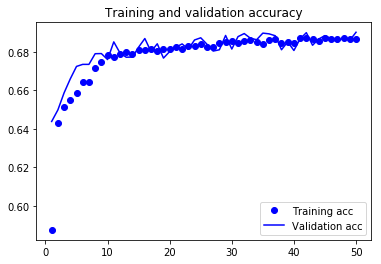

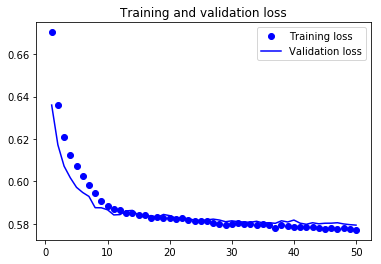

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()